In [368]:
import pandas as pd
import numpy as np

def load_csv(route):
    data = pd.read_csv(route)
    data = data[data.columns[1:]]
    data["Time stamp"] = data["Time stamp"].astype(int)
    data = data.set_index(data["File name"] + data["Time stamp"].astype(str))
    return data

In [369]:
basic = load_csv("/Users/harmonialeo/Downloads/basic/summarise.csv")
taf = load_csv("/Users/harmonialeo/Downloads/taf_se_quantiled/summarise.csv")
taf_minmax = load_csv("/Users/harmonialeo/Downloads/taf_se_minmax/summarise.csv")
den_train = load_csv("/Users/harmonialeo/Downloads/gen2_train_density.csv")
den_val = load_csv("/Users/harmonialeo/Downloads/gen2_val_density.csv")
den_test = load_csv("/Users/harmonialeo/Downloads/gen2_test_density.csv")
rps_time = load_csv("/Users/harmonialeo/Downloads/gen2_generate_time.csv")

In [370]:
test_result = taf.append(basic).append(taf_minmax).merge(rps_time,left_index=True,right_index=True).merge(den_test,left_index=True,right_index=True)

In [371]:
test_result.head()

,Exp name,File name_x,Time stamp_x,Map,Map 50,Map 75,Map small,Map medium,Map large,Infer time,...,Time stamp_y,Generate volume time,Generate taf time,File name,Time stamp,Density,Density negative,Density positive,Density effective,Density effective max
17-04-04_11-00-13_cut_15_122500000_18250000010099999,taf_se_quantiled_best,17-04-04_11-00-13_cut_15_122500000_182500000,10099999,0.0,0.0,0.0,0.0,0.0,-1.0,0.009973,...,10099999,0.000786,0.001411,17-04-04_11-00-13_cut_15_122500000_182500000,10099999,0.003947,0.003893,0.002179,0.005124,0.005128
17-04-04_11-00-13_cut_15_122500000_18250000010099999,basic_newlr,17-04-04_11-00-13_cut_15_122500000_182500000,10099999,0.0,0.0,0.0,0.0,0.0,-1.0,0.008063,...,10099999,0.000786,0.001411,17-04-04_11-00-13_cut_15_122500000_182500000,10099999,0.003947,0.003893,0.002179,0.005124,0.005128
17-04-04_11-00-13_cut_15_122500000_18250000010099999,taf_se_minmax,17-04-04_11-00-13_cut_15_122500000_182500000,10099999,0.0,0.0,0.0,0.0,0.0,-1.0,0.009408,...,10099999,0.000786,0.001411,17-04-04_11-00-13_cut_15_122500000_182500000,10099999,0.003947,0.003893,0.002179,0.005124,0.005128
17-04-04_11-00-13_cut_15_122500000_18250000010599999,taf_se_quantiled_best,17-04-04_11-00-13_cut_15_122500000_182500000,10599999,0.0,0.0,0.0,0.0,0.0,-1.0,0.015354,...,10599999,0.000777,0.001397,17-04-04_11-00-13_cut_15_122500000_182500000,10599999,0.000644,0.000603,0.000356,0.000351,0.000520
17-04-04_11-00-13_cut_15_122500000_18250000010599999,basic_newlr,17-04-04_11-00-13_cut_15_122500000_182500000,10599999,0.0,0.0,0.0,0.0,0.0,-1.0,0.008136,...,10599999,0.000777,0.001397,17-04-04_11-00-13_cut_15_122500000_182500000,10599999,0.000644,0.000603,0.000356,0.000351,0.000520


In [372]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [373]:
test_result["Run time"] = np.where(test_result["Exp name"] == "basic_newlr", test_result["Infer time"] + test_result["Generate volume time"], test_result["Infer time"] + test_result["Generate taf time"])

In [374]:
basic_Run_time = test_result["Run time"][test_result["Exp name"] == "basic_newlr"]
basic_Run_time = basic_Run_time[basic_Run_time!=basic_Run_time.max()]

In [375]:
basic_Run_time.min()

0.008463144302368001

In [376]:
basic_Run_time.max()

0.0192687511444091

In [377]:
basic_Run_time.mean()

0.009345022710808448

In [378]:
taf_Run_time = test_result["Run time"][test_result["Exp name"] == "taf_se_quantiled_best"]
taf_Run_time = taf_Run_time[taf_Run_time!=taf_Run_time.max()]

In [379]:
taf_Run_time.max()

0.030833721160888502

In [380]:
taf_Run_time.min()

0.0102362632751464

In [381]:
taf_Run_time.mean()

0.012241841023864228

In [382]:
basic_Run_time.quantile(0.99)

0.012521891593933056

In [383]:
taf_Run_time.quantile(0.99)

0.019888486862182576

In [384]:
taf_minmax_Run_time = test_result["Run time"][test_result["Exp name"] == "taf_se_minmax"]
taf_minmax_Run_time = taf_minmax_Run_time[taf_minmax_Run_time!=taf_minmax_Run_time.max()]

In [385]:
taf_minmax_Run_time.max()

0.025498867034912002

In [386]:
taf_minmax_Run_time.min()

0.0096428394317626

In [387]:
taf_minmax_Run_time.median()

0.011048555374145449

In [388]:
taf_minmax_Run_time.quantile(0.99)

0.018407125473022326

In [389]:
den_all = den_train.append(den_val).append(den_test)

No handles with labels found to put in legend.


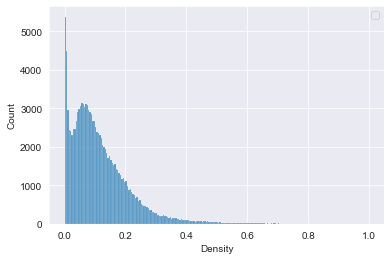

In [390]:
sns.histplot(den_all["Density"])
plt.legend()

No handles with labels found to put in legend.


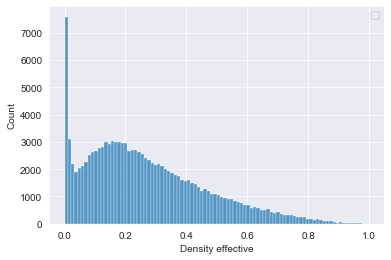

In [391]:
sns.histplot(den_all["Density effective"])
plt.legend()

<AxesSubplot:xlabel='Density negative', ylabel='Density positive'>

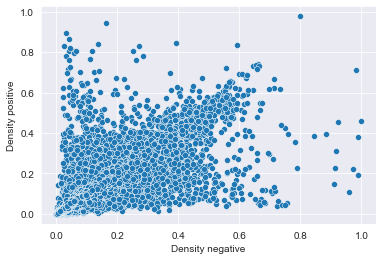

In [392]:
sns.scatterplot(x="Density negative",y="Density positive",data=den_all)

<AxesSubplot:xlabel='Density diff', ylabel='Density'>

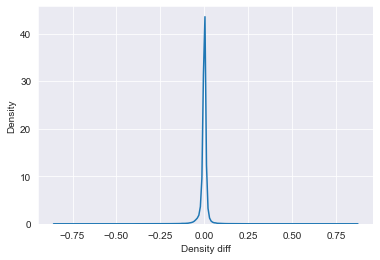

In [393]:
den_all["Density diff"] = den_all["Density positive"] - den_all["Density negative"]
sns.kdeplot(den_all["Density diff"])

In [394]:
den_all["Density diff"].mean()

-0.0018105689986598942

In [395]:
den_all["Density diff"].std()

0.03203463518067613

In [396]:
den_all["type"] = np.where(
    ((den_all["Density positive"] - den_all["Density negative"]) > den_all["Density diff"].mean() + 3 * den_all["Density diff"].std())|
    ((den_all["Density positive"] - den_all["Density negative"]) < den_all["Density diff"].mean() - 3 * den_all["Density diff"].std()), 6, 0)

In [397]:
from scipy.stats import norm, mstats
import scipy.stats as stats

def mk_test(x):
    x = x.values.tolist()
    n = len(x)
    alpha = 0.05

    # calculate S
    s = 0
    for k in range(n-1):
        for j in range(k+1, n):
            s += np.sign(x[j] - x[k])

    # calculate the unique data
    unique_x, tp = np.unique(x, return_counts=True)
    g = len(unique_x)

    # calculate the var(s)
    if n == g:  # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18
    else:  # there are some ties in data
        var_s = (n*(n-1)*(2*n+5) - np.sum(tp*(tp-1)*(2*tp+5)))/18

    if s > 0:
        z = (s - 1)/np.sqrt(var_s)
    elif s < 0:
        z = (s + 1)/np.sqrt(var_s)
    else: # s == 0:
        z = 0

    # calculate the p_value
    p = 2*(1-norm.cdf(abs(z)))  # two tail test
    h = abs(z) > norm.ppf(1-alpha/2)

    if (z < 0) and h:
        trend = -1
    elif (z > 0) and h:
        trend = 1
    else:
        trend = 0

    return trend

def cos_staut(x):
    x = x.values.tolist()
    lst=x.copy()
    raw_len=len(lst)
    if raw_len%2==1:
        del lst[int((raw_len-1)/2)]
    c=int(len(lst)/2)
    n_pos=n_neg=0
    for i in range(c):
        diff=lst[i+c]-lst[i]
        if diff>0:
            n_pos+=1
        elif diff<0:
            n_neg+=1
        else:
            continue
    num=n_pos+n_neg
    k=min(n_pos,n_neg)
    p_value=2*stats.binom.cdf(k,num,0.5)
    if n_pos>n_neg and p_value<0.05:
        return 1
    elif n_neg>n_pos and p_value<0.05:
        return -1
    else:
        return 0

In [398]:
#trends = den_all.sort_values("Time stamp",ascending=True).groupby("File name").rolling(window=10,center=True)["Density effective"].apply(mk_test)
trends0 = den_all.sort_values("Time stamp",ascending=True).groupby("File name").rolling(window=15,center=True)["Density effective"].apply(mk_test)
trends1 = den_all.sort_values("Time stamp",ascending=True).groupby("File name").rolling(window=7)["Density effective"].apply(mk_test)
trends2 = -den_all.sort_values("Time stamp",ascending=False).groupby("File name").rolling(window=7)["Density effective"].apply(mk_test)

In [399]:
trends0df = pd.DataFrame({"trend0":trends0.values}, index=[ind[1] for ind in trends0.index])
trends1df = pd.DataFrame({"trend1":trends1.values}, index=[ind[1] for ind in trends1.index])
trends2df = pd.DataFrame({"trend2":trends2.values}, index=[ind[1] for ind in trends2.index])
den_all = den_all.merge(trends0df,left_index=True,right_index=True).merge(trends1df,left_index=True,right_index=True).merge(trends2df,left_index=True,right_index=True)

In [400]:
den_all["trend"] = np.where((den_all["trend0"]!=den_all["trend0"])&(den_all["trend1"]!=den_all["trend1"]),den_all["trend2"],den_all["trend0"])
den_all["trend"] = np.where((den_all["trend0"]!=den_all["trend0"])&(den_all["trend2"]!=den_all["trend2"]),den_all["trend1"],den_all["trend"])

In [401]:
import numpy as np

#den_all["type"] = np.where(den_all["Density effective_y"] == 1, "sub-scene 5", "others")
#den_all["type"] = np.where(den_all["Density effective_y"] == -1, "sub-scene 2", den_all["type"])
den_all["type"] = np.where((den_all["trend"] == 1)&(den_all["type"] == 0), 5, den_all["type"])
den_all["type"] = np.where((den_all["trend"] == -1)&(den_all["type"] == 0), 2, den_all["type"])

In [402]:
den_eff = den_all[den_all["type"] == 0]["Density effective"] + 1e-8

In [403]:
from pomegranate import *

model3 = GeneralMixtureModel.from_samples([GammaDistribution], 2, den_eff[:,None])
model3

<ipython-input-403-c3e55c5f0954>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model3 = GeneralMixtureModel.from_samples([GammaDistribution], 2, den_eff[:,None])


{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "IndependentComponentsDistribution",
            "parameters" : [
                [
                    {
                        "class" : "Distribution",
                        "name" : "GammaDistribution",
                        "parameters" : [
                            2.742621513961077,
                            8.49979375900122
                        ],
                        "frozen" : false
                    }
                ],
                [
                    1.0
                ]
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "IndependentComponentsDistribution",
            "parameters" : [
                [
                    {
                        "class" : "Distribution",
                        "name" : "GammaDistribution",
                      

<ipython-input-404-aed54620e661>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sns.lineplot(den_eff[::100], model3.probability(den_eff[::100,None]), label="Mixture")
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


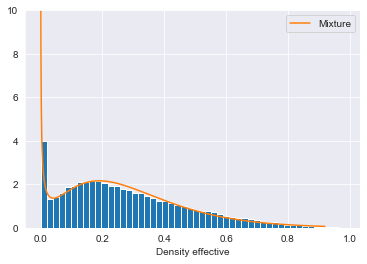

In [404]:
plt.hist(den_eff, bins=50, density=True, stacked=True)
#sns.lineplot(den_eff[::100], model3.distributions[0].probability(den_eff[::100,None]), label="Distribution 1")
#sns.lineplot(den_eff[::100], model3.distributions[1].probability(den_eff[::100,None]), label="Distribution 2")
sns.lineplot(den_eff[::100], model3.probability(den_eff[::100,None]), label="Mixture")
plt.legend()
plt.ylim((0,10))
plt.show()

In [405]:
labels = model3.predict_proba(den_test[["Density effective"]]).argmax(axis=1)

In [406]:
den_test = den_test.merge(den_all[["type"]],left_index=True,right_index=True,how="left")

In [407]:
den_test["type"] = np.where((labels==0)&(den_test["type"]==0), 3, den_test["type"])
den_test["type"] = np.where((labels==1)&(den_test["type"]==0), 1, den_test["type"])

/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

<AxesSubplot:xlabel='Time stamp', ylabel='Density effective'>

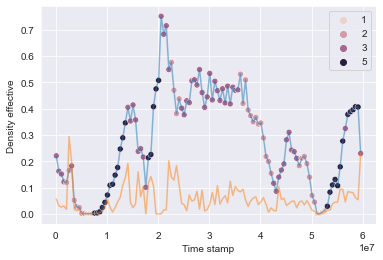

In [408]:
subset = den_test[den_test["File name"] == "17-04-12_19-21-02_427500000_487500000"]
sns.scatterplot("Time stamp","Density effective", hue = "type", data = subset)
sns.lineplot("Time stamp","Density effective", data = subset, alpha = 0.5)
sns.lineplot("Time stamp",subset["Density effective max"]-subset["Density effective"], data = subset, alpha = 0.5)

/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

<AxesSubplot:xlabel='Time stamp', ylabel='Density effective'>

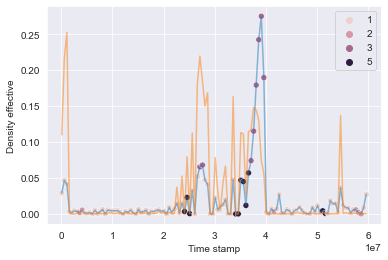

In [409]:
# sns.scatterplot("Time stamp","Density effective_x", hue = "type", data = subset)
# sns.lineplot("Time stamp","Density effective_x", data = subset, color = "pink", alpha = 0.5)
subset = den_test[den_test["File name"] == "17-04-04_11-00-13_cut_15_61500000_121500000"]
sns.scatterplot("Time stamp","Density effective", hue = "type", data = subset)
sns.lineplot("Time stamp","Density effective", data = subset, alpha = 0.5)
sns.lineplot("Time stamp",subset["Density effective max"]-subset["Density effective"], data = subset, alpha = 0.5)

In [412]:
def filtering0(x):
    mode = x.mode()
    x = x.values
    if np.sum(x == mode) > len(x)/2:
        if (x[len(x)/2] != mode)&(mode == 3):
            return 4
        else:
            return mode
    else:
        return x[len(x)/2]

def filtering1(x):
    mode = x.mode()
    x = x.values
    if np.sum(x == mode) > len(x)/2:
        if (x[-1] != mode)&(mode == 3):
            return 4
        else:
            return mode
    else:
        return x[-1]

In [413]:
filtered_type0 = den_all.sort_values("Time stamp",ascending=True).groupby("File name").rolling(window=21,center=True)["type"].apply(filtering0)
filtered_type1 = den_all.sort_values("Time stamp",ascending=True).groupby("File name").rolling(window=11)["type"].apply(filtering1)
filtered_type2 = -den_all.sort_values("Time stamp",ascending=False).groupby("File name").rolling(window=11)["type"].apply(filtering1)

AttributeError: 'numpy.ndarray' object has no attribute 'mode'

([<matplotlib.patches.Wedge at 0x7f8320560be0>,
 [Text(-0.8185117061243682, 0.7348731774513043, 'others'),
  Text(0.4852481613420572, -0.9871849988295776, 'sub-scene 5'),
  Text(1.002014340188661, -0.4538361621293334, 'sub-scene 2'),
  Text(1.098985264203552, -0.04723758104993524, 'sub-scene 6')])

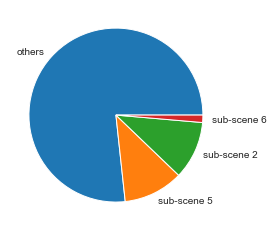

In [ ]:
plt.pie([(den_all["type"]==unique).sum() for unique in den_all["type"].unique()],labels=den_all["type"].unique())

In [ ]:
den_all[den_all["type"]=="sub-scene 6"]["File name"].unique()

array(['17-04-04_11-00-13_cut_1_244500000_304500000',
       '17-04-06_09-57-37_671500000_731500000',
       '17-03-30_12-53-58_427500000_487500000',
       '17-08-24_15-22-52_610500000_670500000',
       '18-03-29_12-49-45_488500000_548500000',
       '17-10-17_17-31-19_671500000_731500000',
       '17-03-30_12-53-58_4026500000_4086500000',
       '17-10-17_16-25-46_1037500000_1097500000',
       '17-10-18_14-59-16_488500000_548500000',
       '17-04-04_11-00-13_cut_3_122500000_182500000',
       '17-04-11_12-00-08_122500000_182500000',
       '17-10-18_11-18-01_500000_60500000',
       '17-10-11_16-25-22_1464500000_1524500000',
       '17-10-19_11-15-48_122500000_182500000',
       '17-10-17_16-25-46_915500000_975500000',
       '17-04-06_17-08-55_2013500000_2073500000',
       '18-03-29_13-09-51_122500000_182500000',
       '17-04-06_09-57-37_915500000_975500000',
       '17-04-10_17-59-01_500000_60500000',
       '17-08-28_09-54-44_793500000_853500000',
       '17-04-06_09-57-37_73

/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time stamp', ylabel='Density effective_x'>

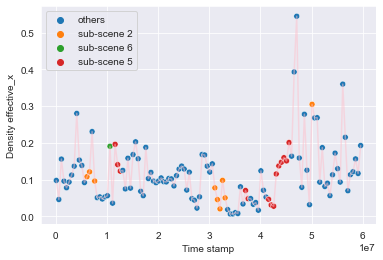

In [ ]:
subset = den_all[den_all["File name"] == "17-04-13_15-05-43_3599500000_3659500000"]
sns.scatterplot("Time stamp","Density effective_x", hue = "type", data = subset)
sns.lineplot("Time stamp","Density effective_x", data = subset, color = "pink", alpha = 0.5)

<AxesSubplot:xlabel='Map', ylabel='Density'>

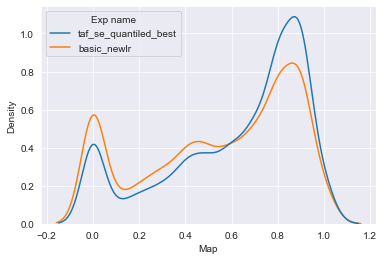

In [ ]:
import matplotlib.pyplot as plt

sns.kdeplot(test_result["Map"],hue=test_result["Exp name"])

In [ ]:
test_result = test_result.merge(den_test["type"],right_index=True,left_index=True)

<AxesSubplot:xlabel='type', ylabel='Map'>

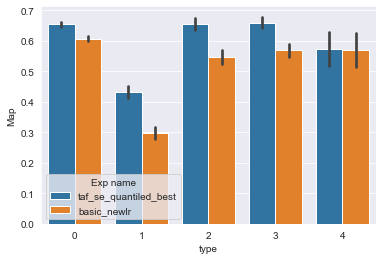

In [ ]:
sns.barplot(x="type",y="Map",hue="Exp name",data=test_result)

<AxesSubplot:xlabel='Map', ylabel='Density'>

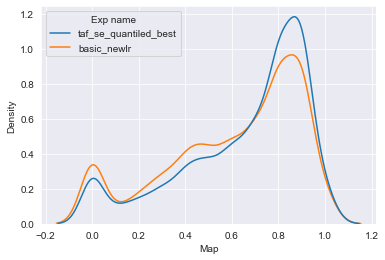

In [ ]:
subset = test_result[test_result["type"]==0]
sns.kdeplot(subset["Map"],hue=subset["Exp name"])

<AxesSubplot:xlabel='Map', ylabel='Density'>

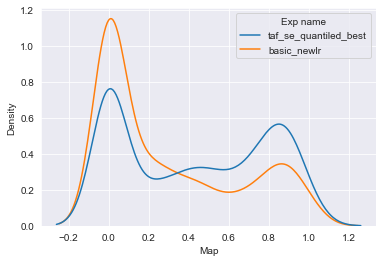

In [ ]:
subset = test_result[test_result["type"]==1]
sns.kdeplot(subset["Map"],hue=subset["Exp name"])

<AxesSubplot:xlabel='Map', ylabel='Density'>

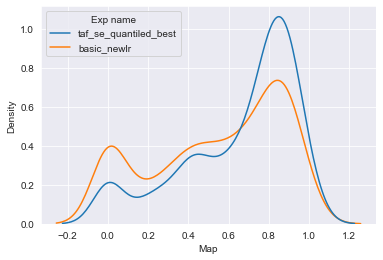

In [ ]:
subset = test_result[test_result["type"]==2]
sns.kdeplot(subset["Map"],hue=subset["Exp name"])

<AxesSubplot:xlabel='Map', ylabel='Density'>

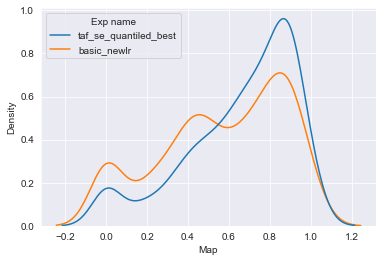

In [ ]:
subset = test_result[test_result["type"]==3]
sns.kdeplot(subset["Map"],hue=subset["Exp name"])

<AxesSubplot:xlabel='Map', ylabel='Density'>

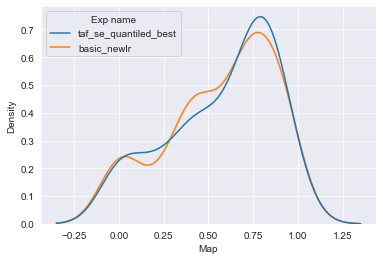

In [ ]:
subset = test_result[test_result["type"]==4]
sns.kdeplot(subset["Map"],hue=subset["Exp name"])